## **Continuous Probability Distributions**

### **1. Uniform Distribution**
The **Uniform Distribution** is a probability distribution where all outcomes in a given range are equally likely. It has two types:  
1. **Discrete Uniform Distribution**: A finite set of outcomes (e.g., rolling a fair die: $ \{1,2,3,4,5,6\} $).  
2. **Continuous Uniform Distribution**: Any real number within an interval (e.g., selecting a random number between 0 and 1).  

The probability density function (PDF) for a continuous uniform distribution is:  
$$
f(x) = \frac{1}{b-a}, \quad a \leq x \leq b
$$
where $ a $ and $ b $ are the lower and upper bounds.

- **Mean**: $ E[X] = \frac{a + b}{2} $
- **Variance**: $ \text{Var}(X) = \frac{(b - a)^2}{12} $

**ML Applications:**  
✅ Random initialization (e.g., weight initialization in deep learning)  
✅ Monte Carlo methods (random sampling)  

### **Where is Uniform Distribution Used in Machine Learning?**

#### **1. Weight Initialization in Neural Networks**
🔹 **Use Case:** In deep learning, initializing weights properly is crucial for stable training.  
🔹 **How Uniform Distribution Helps:**  
   - **Xavier/Glorot Initialization:** Uses a uniform distribution to initialize weights:  
     $$
     W \sim U\left(-\frac{1}{\sqrt{n}}, \frac{1}{\sqrt{n}}\right)
     $$
     where $ n $ is the number of neurons.  
   - Ensures that activations and gradients don’t vanish or explode.

📌 **Why use Uniform Distribution?**  
✅ Prevents biases in weight selection and ensures equal variance across layers.  

#### **2. Random Search for Hyperparameter Tuning**
🔹 **Use Case:** Instead of grid search, **random search** samples hyperparameters from a **uniform distribution** over a given range.  


In [1]:
import numpy as np
from scipy.stats import uniform
import matplotlib.pyplot as plt

def random_hyperparameter_search(n_trials=100):
    """
    Demonstrate hyperparameter tuning using uniform distribution
    
    In machine learning, we often need to search for optimal hyperparameters.
    Rather than testing every possible value (grid search), we can randomly
    sample from reasonable ranges, which is often more efficient.
    """
    # Define search spaces for different hyperparameters
    learning_rate = uniform(loc=0.0001, scale=0.01)  # From 0.0001 to 0.0101
    regularization = uniform(loc=0.01, scale=0.99)   # From 0.01 to 1.00
    dropout_rate = uniform(loc=0.1, scale=0.4)       # From 0.1 to 0.5
    
    # Generate random combinations
    trials = []
    for _ in range(n_trials):
        params = {
            'learning_rate': learning_rate.rvs(),
            'regularization': regularization.rvs(),
            'dropout_rate': dropout_rate.rvs()
        }
        
        # Simulate model performance (in practice, you'd train a real model)
        fake_accuracy = (
            0.85 + 
            0.1 * np.exp(-(params['learning_rate'] - 0.001)**2 / 0.0001) +
            0.05 * params['regularization'] * params['dropout_rate']
        )
        
        trials.append((params, fake_accuracy))
    
    # Find best parameters
    best_trial = max(trials, key=lambda x: x[1])
    
    print("Best hyperparameters found:")
    for param, value in best_trial[0].items():
        print(f"{param}: {value:.4f}")
    print(f"Accuracy: {best_trial[1]:.4f}")
    
    return trials

# Run the search
best_params = random_hyperparameter_search()

Best hyperparameters found:
learning_rate: 0.0015
regularization: 0.8013
dropout_rate: 0.4850
Accuracy: 0.9691


#### **3. Data Augmentation:**

Enhance the robustness and generalization capabilities of machine learning models by adding uniform noise to the training data. This technique, known as data augmentation, involves introducing small random perturbations to the data, which can help models perform better on unseen data by preventing overfitting.

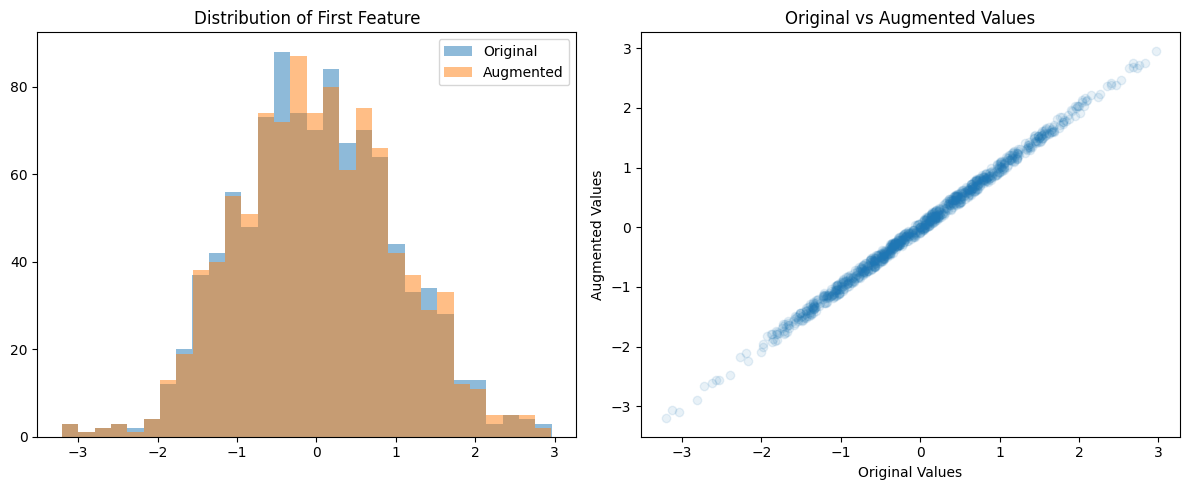

In [2]:
def augment_training_data(X, noise_range=(-0.1, 0.1)):
    """
    Add uniform noise to training data for better generalization
    
    Adding small random perturbations to training data can help
    models become more robust and generalize better.
    """
    noise = uniform(loc=noise_range[0], scale=noise_range[1]-noise_range[0])
    
    # Function to add noise to a single sample
    def add_noise(sample):
        noise_values = noise.rvs(size=sample.shape)
        return sample + noise_values
    
    # Create augmented dataset
    X_augmented = np.array([add_noise(sample) for sample in X])
    
    # Visualize original vs augmented data for first feature
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(X[:, 0], bins=30, alpha=0.5, label='Original')
    plt.hist(X_augmented[:, 0], bins=30, alpha=0.5, label='Augmented')
    plt.title('Distribution of First Feature')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.scatter(X[:, 0], X_augmented[:, 0], alpha=0.1)
    plt.xlabel('Original Values')
    plt.ylabel('Augmented Values')
    plt.title('Original vs Augmented Values')
    
    plt.tight_layout()
    plt.show()
    
    return X_augmented

# Generate sample data and augment it
X = np.random.randn(1000, 5)  # 1000 samples, 5 features
X_aug = augment_training_data(X)

### **2. Normal Distribution:**  
The **Normal Distribution** (also called the **Gaussian Distribution**) is a **continuous probability distribution** where data tends to cluster around a central value with symmetric variation in both directions. It is characterized by its **bell-shaped curve**.

The **probability density function (PDF)** is given by:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x - \mu)^2}{2\sigma^2}}
$$

where:  
- $ \mu $ = **Mean** (center of the distribution)  
- $ \sigma $ = **Standard deviation** (spread of the distribution)  
- $ \sigma^2 $ = **Variance**  
- $ e $ = Euler’s number (~2.718)  

#### **Key Properties of Normal Distribution:**
1. **Symmetry**: It is symmetric around the mean ($\mu$).  
2. **68-95-99.7 Rule**:  
   - 68% of data lies within **1 standard deviation** ($\mu \pm \sigma$).  
   - 95% within **2 standard deviations** ($\mu \pm 2\sigma$).  
   - 99.7% within **3 standard deviations** ($\mu \pm 3\sigma$).  
3. **Many natural phenomena** (e.g., heights, IQ scores, stock returns) follow a normal distribution.  

#### **Where is Normal Distribution Used in Machine Learning?**

#### **1. Weight Initialization in Neural Networks**
🔹 **Use Case:** Deep learning models require proper weight initialization for stable training.  
🔹 **How Normal Distribution Helps:**  
   - **He (Kaiming) and Xavier Initialization** sample weights from a normal distribution:
     $$
     W \sim \mathcal{N}(0, \sigma^2)
     $$
   - Prevents gradients from vanishing/exploding.  


#### **2. Feature Scaling and Standardization**
🔹 **Use Case:** Many ML models (e.g., SVM, k-means) **perform better when features are normally distributed**.  
🔹 **How It's Used:**  
   - **Standardization (Z-score normalization)** transforms data to have:  
     $$
     X' = \frac{X - \mu}{\sigma}
     $$
   - Ensures features have **mean = 0** and **variance = 1**.  


#### **3. Anomaly Detection**
🔹 **Use Case:** Detect outliers in network traffic, fraud detection, and industrial sensors.  
🔹 **How It Works:**  
   - **Assume normal behavior follows a Gaussian distribution.**  
   - Compute **Z-scores** for new data points:
     $$
     Z = \frac{X - \mu}{\sigma}
     $$
   - If $ |Z| > 3 $, classify as an **anomaly**.  

#### **4. Gaussian Naïve Bayes for Classification**
🔹 **Use Case:** **Gaussian Naïve Bayes (GNB)** assumes features are normally distributed:  
   - Used in **text classification, spam detection, and medical diagnosis**.  
   - Probability of a feature $ x_i $ given class $ C $ is modeled as:
     $$
     P(x_i | C) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x_i - \mu)^2}{2\sigma^2}}
     $$